In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
dark = sns.color_palette('dark')
bright = sns.color_palette('bright')
deep = sns.color_palette('deep')
pastel = sns.color_palette('pastel')

## Style to be used in plots
plt.style.use("ggplot")

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
df =pd.read_csv("insurance.csv")

In [6]:
df


age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [7]:
## Checking The Shape of the data (Rows, Column)
df.shape

(1338, 7)

In [8]:
## Concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
##  Description of data
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [10]:
## Checking For Any Null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking distribution of each column

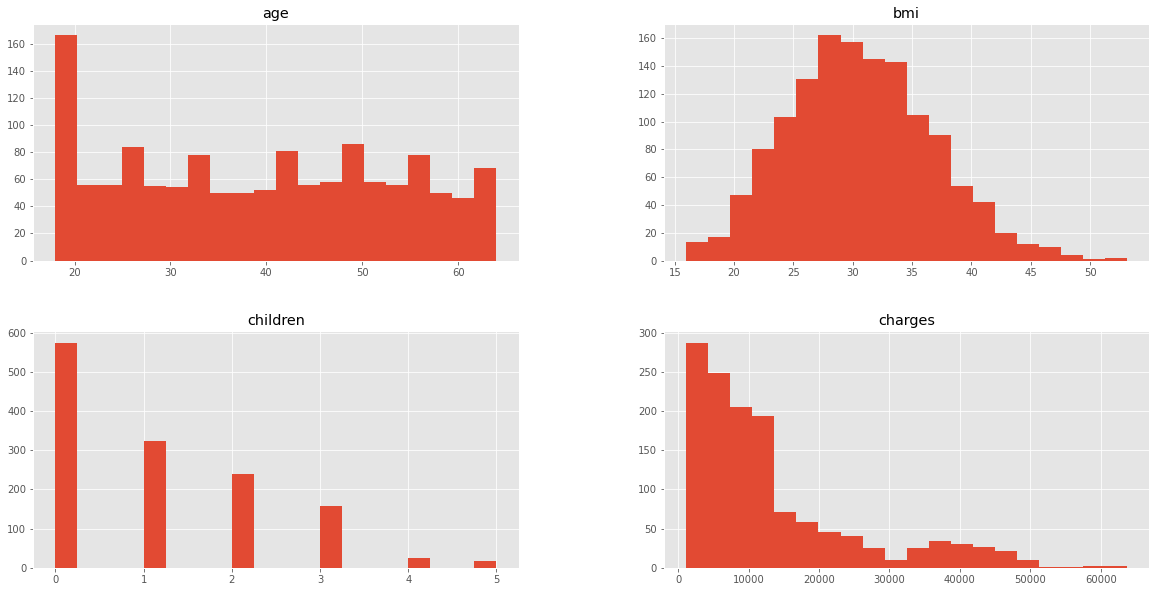

In [11]:
## Numerical Columns
df.hist(bins=20,figsize=(20,10));

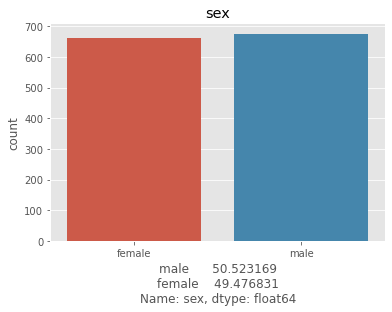

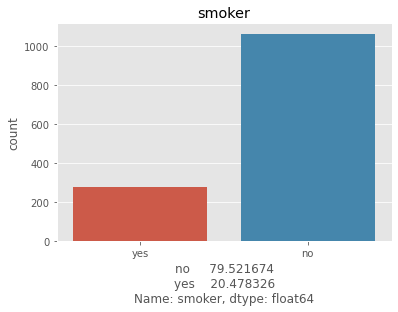

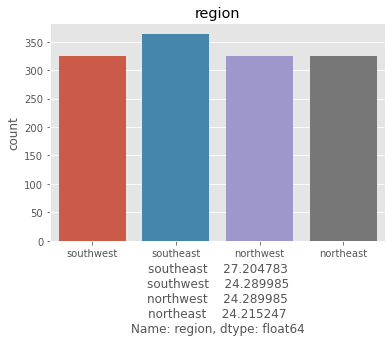

In [12]:
## Categorical Columns
categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O']
for col in categorical_columns:
    sns.countplot(col,data=df)
    labels = (df[col].value_counts() / len(df))*100
    plt.title(col)
    plt.xlabel(f'{labels}')
    plt.show()

# Visualizing Relationship Between Features and Dependent Variable (charges)# 

In [13]:
## Prints All The Column Names In a List
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Age vs Charges

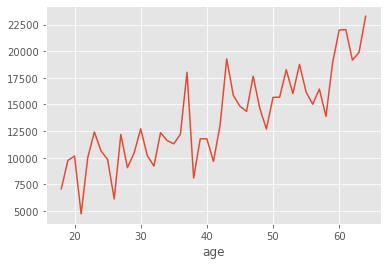

In [14]:
df.groupby('age')['charges'].mean().plot()

### By Looking At The Above Graph We Can State That Insurance Charges Increases With Age, Which Is Generally True Because People With Higher Age Has A Higher Chance of Death

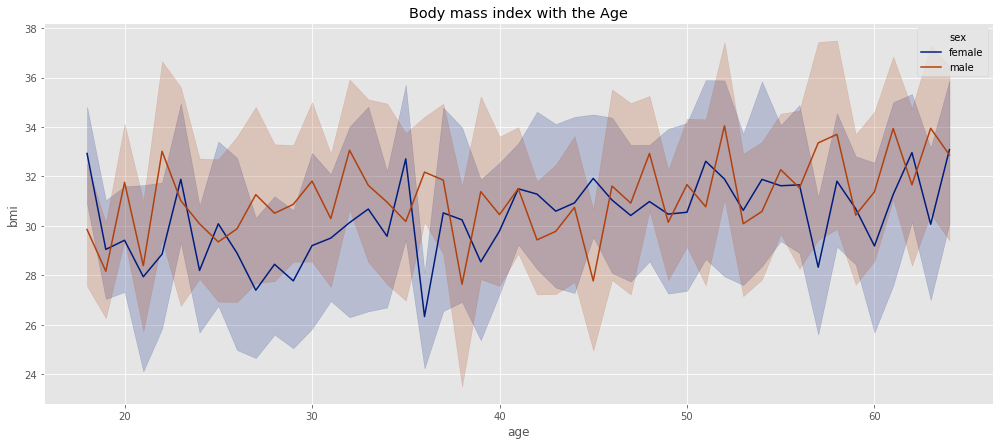

In [15]:
## Age vs BMI
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex",palette='dark')
plt.title("Body mass index with the Age")
plt.show()

## Sex Vs Charges

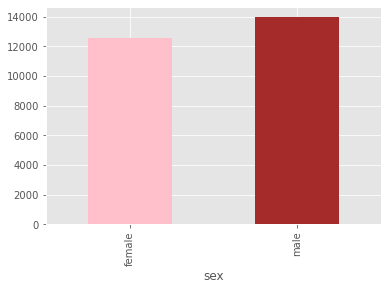

In [16]:
temp = df.groupby('sex')['charges'].mean()
temp.plot(kind='bar',color=['pink','brown'])

## Smoker Vs Charges

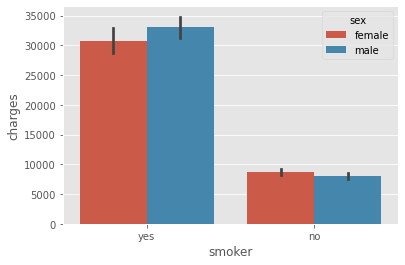

In [17]:
sns.barplot(data=df,x='smoker',y='charges',hue='sex')

# #BMI Vs Charges

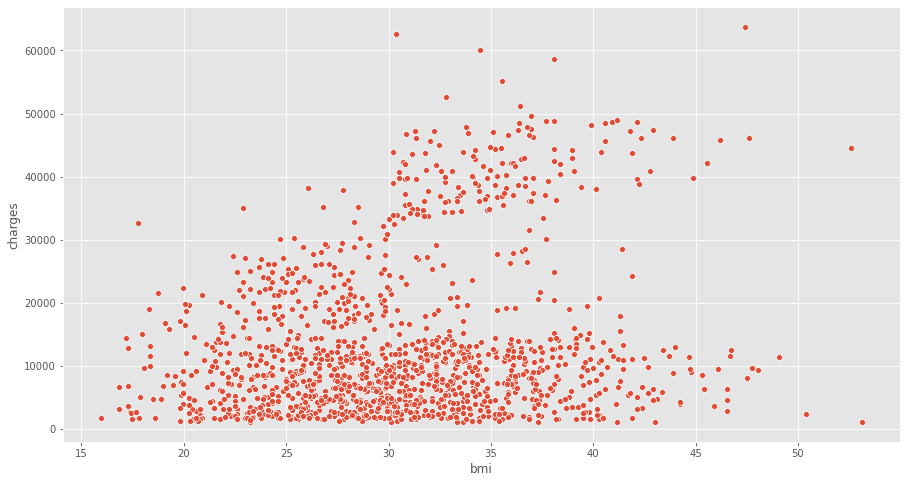

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='bmi',y='charges')

## Children Vs Charges

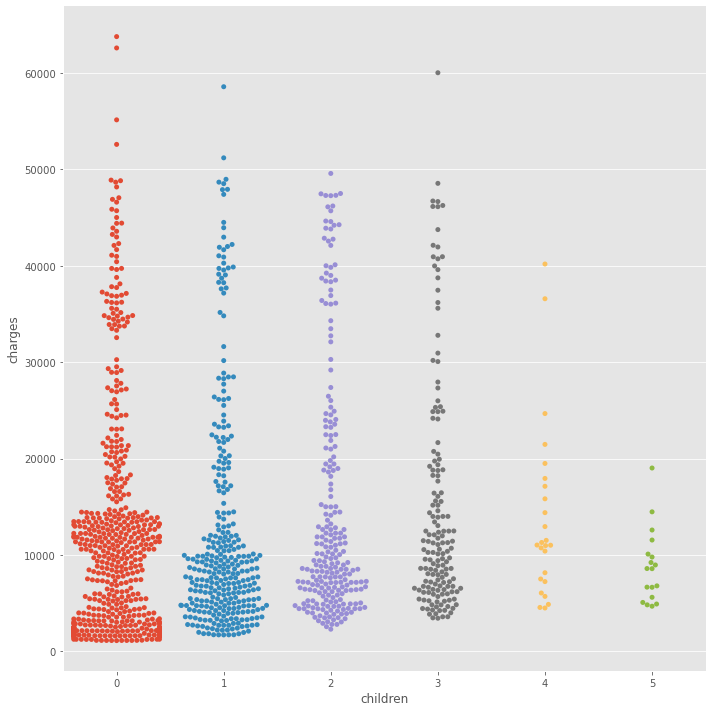

In [19]:
sns.catplot(x="children", y="charges",kind="swarm", data=df,height=10)

# #Region Vs Charges

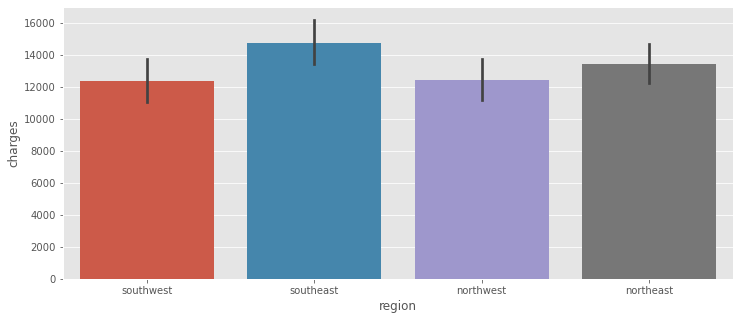

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='region',y='charges')

# #Regions with amount of people

In [21]:
# plt.figure(figsize=(12,5))
# ax = sns.countplot(data=df,x='region')
# ax.bar_label(ax.containers[0])

# #Region Vs Smoker

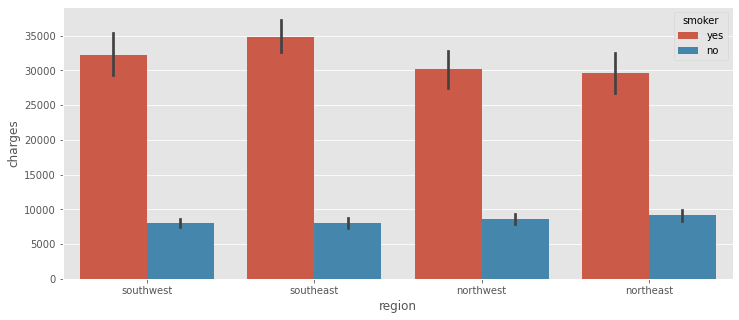

In [22]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df,x='region',y='charges',hue='smoker')

# #Region With Oldest People (Age >50)

Text(0.5, 1.0, 'Regions With Oldest People')

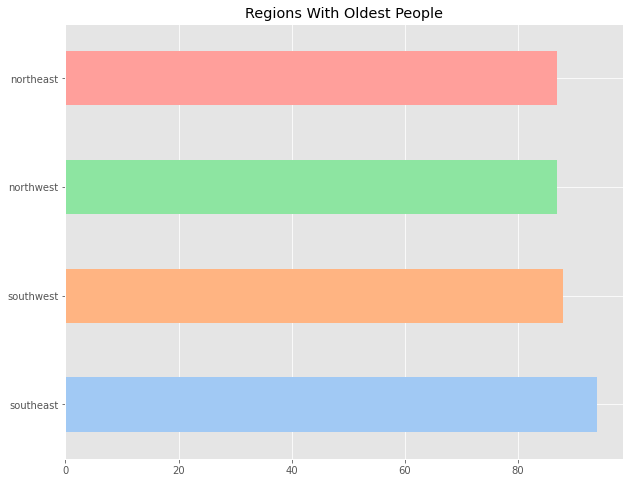

In [23]:
ax = df[df['age']>50]['region'].value_counts().plot.barh(color=pastel,figsize=(10,8))
plt.title('Regions With Oldest People')

# Finding Relationship Between Multiple Features and Charges

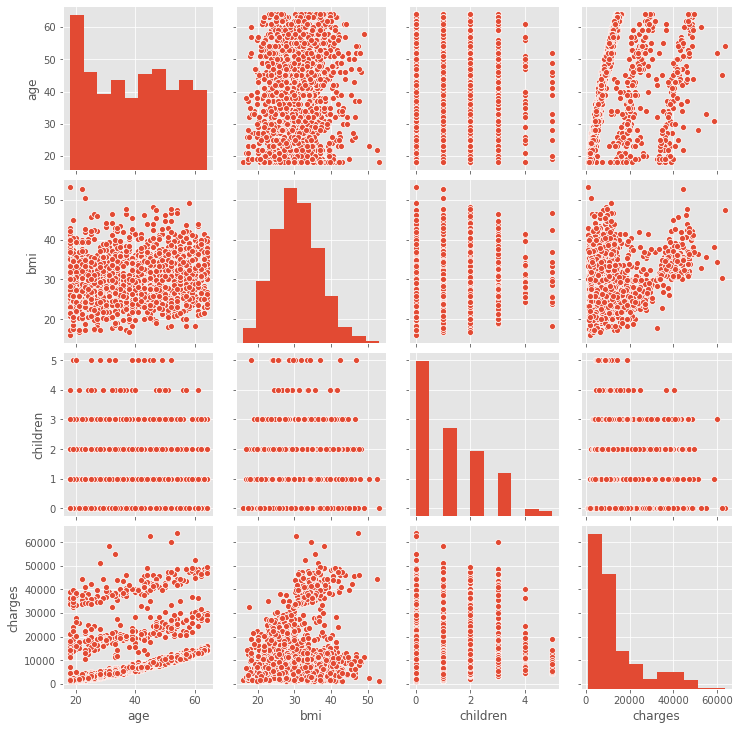

In [24]:
sns.pairplot(df)

## Sex, Smoker, Region vs Charges

In [25]:
# ## Making a Group 
# temp=df.groupby(["sex","smoker","region"])["charges"].mean().round(2)
# ax = temp.plot(kind="bar", figsize=(20,7),color=pastel)
# ax.bar_label(ax.containers[0])
# plt.title('Person With Average Charges Based On Sex, Region and Smoking Habit');

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
plt.figure(figsize=(17,7))
px.scatter(data_frame=df,
           x='bmi', 
           y='charges',
           color="sex",
           size="children",
           symbol='smoker',
           hover_name='region',
           text='age',
           title='Group Information Of Insurance Data On Different Scatter Points')

<Figure size 1224x504 with 0 Axes>

# Results from the Analysis

### 1)Dataset Doesn't Have Any Missing Values

### 2)BMI (Body Mass Index) Follows A Close To Gaussian Distribution

### 3)There Are Three Categorical Columns - ['sex', 'smoker', 'region'] 

### 4) There Are Four Numerical Columns - ['age','bmi','children','charges']


### 5) As the Age of The Person Increase Insurance Charges Also increases.

### 6) A Smoker Has Higher Insurance Charges Than A Non-Smoker.

### 7)Males Smokes More Than Females.


### 8)Southeast region has more amount of smokers and old people than other regions.

### 9) The Insurance Charge Based On a Region is Also Similar.

### 10)People Having Less Children Will Most Likely To Opt for an Insurance.

### 11) The Insurance Charge Based On a Region is Also Similar.

# STEP 3: Feature Engineering

In [28]:
## Handling Categorical Data
categorical_columns

['sex', 'smoker', 'region']

#### Label Encoding Refers To a Technique In Which Each Categorical Variable is Given a Numerical Label(0,1,2,3...). We Will Use This Method To Convert Oue Categories Into Numerical Form

In [29]:
## Label Encoding All Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [30]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

# STEP 4: Data Splitting

In [31]:
## Data splitting
X = df.drop('charges',axis=1).values
y = df['charges'].values

In [32]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [33]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [34]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
X_train.shape

(1003, 6)

In [36]:
X_test.shape

(335, 6)

# STEP 5: Model Training

##### We Will First Train Some Models From Different Families On Their Default Parameters and Which Ever Gives Us The Max Accuracy We Will Tune It to enhance the results even more better.



In [37]:
## Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression  

linreg=LinearRegression()
linreg.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", linreg.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", linreg.score(X_test,y_test))

Score the X-train with Y-train is :  0.7449087316606229
Score the X-test  with Y-test  is :  0.7668905583460908


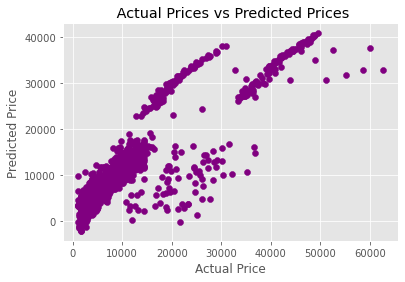

In [39]:
train_dataLin=linreg.predict(X_train)
plt.scatter(y_train, train_dataLin,c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", ridge.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", ridge.score(X_test,y_test))

Score the X-train with Y-train is :  0.7448854834230265
Score the X-test  with Y-test  is :  0.7666341034837011


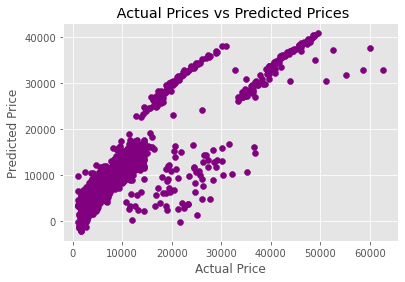

In [41]:
train_dataRid=ridge.predict(X_train)
plt.scatter(y_train, train_dataRid,c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##### Well, Our Regression Models Are Underfitted On The Data So Let's Try With Tree Based Models.

# Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=42)
dtr.fit(X_train,y_train)


print("Score the X-train with Y-train is : ", dtr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", dtr.score(X_test,y_test))

y_pred = dtr.predict(X_test)
print("MSE: " ,mean_squared_error(np.log(y_test),np.log(y_pred)))

Score the X-train with Y-train is :  0.9987411422200098
Score the X-test  with Y-test  is :  0.7298419299135146
MSE:  0.2738371965665194


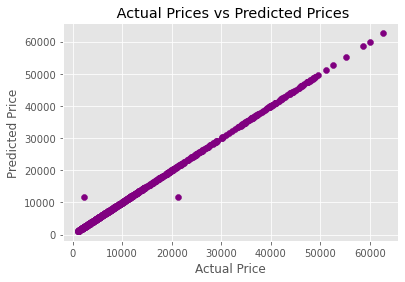

In [43]:
train_dataTree=dtr.predict(X_train)
plt.scatter(y_train, train_dataTree,c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##### Decision Tree is Overfitting, But We Can Improve It Using Ensemble Methods

# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)


print("Score the X-train with Y-train is : ", rfr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", rfr.score(X_test,y_test))

y_pred = rfr.predict(X_test)
print("MSE: " ,mean_squared_error(np.log(y_test),np.log(y_pred)))

Score the X-train with Y-train is :  0.9758342257255146
Score the X-test  with Y-test  is :  0.8456549780274321
MSE:  0.19273481258661257


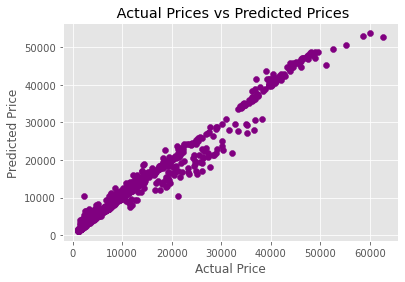

In [45]:
train_dataRfr=rfr.predict(X_train)
plt.scatter(y_train, train_dataRfr,c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Our Bagging Models Giving A Good Accuracy Now, Let's Try With Boosting Models and See Whether They Can Perform Better or Not.

# Boosting

### ADA Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=42)
abr.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", abr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", abr.score(X_test,y_test))

y_pred = abr.predict(X_test)
print("MSE: " ,mean_squared_error(np.log(y_test),np.log(y_pred)))

In [ ]:
train_dataAbr=abr.predict(X_train)
plt.scatter(y_train, train_dataAbr,c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", gbr.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", gbr.score(X_test,y_test))

y_pred = gbr.predict(X_test)
print("MSE: " ,mean_squared_error(np.log(y_test),np.log(y_pred)))

In [ ]:
train_dataGbr=gbr.predict(X_train)
plt.scatter(y_train, train_dataGbr,c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Since, We Got Highest Accuracy From Gradient Boost Regressor We Will Tune Its Parameters To Improve The Accuracy.

# Hyperparameter Tuning On GB

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.5,0.10,0.01,0.1],
             'n_estimators':[25,50,75,100,125],
              'max_depth':[5,7,9,10],
              'subsample':[1,2],
              'min_samples_split':[1,2,3],
              'min_samples_leaf':[1,1.5,2],
              'max_depth':[5,7,9,10]
              
             }

g_search = GridSearchCV(estimator = gbr, param_grid = param_grid,cv = 3, n_jobs = 1,verbose = True, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)
print(g_search.score(X_test, y_test))

#### Accuracy is improved with 0.19%

In [ ]:
y_pred = g_search.predict(X_test)

In [ ]:
sns.residplot(y_test,y_pred)

In [47]:
print("R2 Score Gradient Boost Regressor" ,r2_score(y_test,y_pred))

R2 Score Gradient Boost Regressor 0.8620723038472637


In [48]:
print("MSE: " ,mean_squared_error(np.log(y_test),np.log(y_pred)))

MSE:  0.20393297539320104


## Predicting for New Data

### Let's Give Some Input Based On Our Analysis

### New Input Data 1 : [61,1,35,3,1,2]
### New Input Data 2: [19,0,23,0,0,0]

In [49]:
data = [61,1,35,3,1,2]
new_data = pd.DataFrame([data],columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
g_search.predict(new_data)

array([46331.26902893])

In [50]:
data = [19,0,23,0,0,0]
new_data = pd.DataFrame([data],columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
g_search.predict(new_data)

array([4003.78756593])

#### You Can See From Both The New Inputs

#### -> If a person is older, smokes, is a male then charges will be high.

#### -> if a person is younger, doesn't smoke, is a girl then charges will be low.

## Our Model Is Predicting Well And Follows All The Analysis.